In [17]:
import pandas as pd
from copy import deepcopy
from collections import Counter
import random

import numpy as np
import statsmodels.api as sm

from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
import keras
from keras import layers

ModuleNotFoundError: No module named 'keras'

# EDA: Exploratory Data Analysis

In [2]:
df = pd.read_csv('Bengaluru_House_Data.csv')

In [3]:
df.dropna(subset=['size'], inplace = True)

In [4]:
df['size_num'] = [float(i.split()[0]) for i in list(df['size'].values)]

In [5]:
df['availability_num'] = [1 if x == 'Ready To Move' else 0 for x in list(df['availability'].values)]

In [6]:
df['society_num'] = [1 if str(x) != 'nan' else 0 for x in list(df['society'].values)]

In [7]:
req_cols = ['total_sqft', 'bath', 'balcony', 'price', 'size_num', 'availability_num', 'society_num']

In [8]:
df = df.loc[df['total_sqft'].str.isnumeric()]
print(df.shape)

(12978, 12)


# Data Cleaning for "total_sqft"

In [9]:
df['total_sqft'] = [x.split(" ")[0] for x in list(df['total_sqft'].values)]
df['total_sqft'] = [x.split(".")[0] for x in list(df['total_sqft'].values)]
df['total_sqft'] = [x.split("P")[0] for x in list(df['total_sqft'].values)]
df['total_sqft'] = [x.split("S")[0] for x in list(df['total_sqft'].values)]
df['total_sqft'] = [x.split("A")[0] for x in list(df['total_sqft'].values)]
df['total_sqft'] = [x.split("C")[0] for x in list(df['total_sqft'].values)]
df['total_sqft'] = [x.split("G")[0] for x in list(df['total_sqft'].values)]
df['total_sqft'] = [float(x) for x in list(df['total_sqft'].values)]

In [10]:
df_2 = df[req_cols]

In [11]:
print("Before dropping nulls:", df_2.shape[0])
df_2.dropna(inplace = True)
print("After dropping nulls:", df_2.shape[0])

Before dropping nulls: 12978
After dropping nulls: 12439


/tmp/ipykernel_165391/1041523848.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2.dropna(inplace = True)


In [12]:
train_cols = ['total_sqft', 'bath', 'balcony', 'size_num', 'availability_num', 'society_num']

In [13]:
df_2

,total_sqft,bath,balcony,price,size_num,availability_num,society_num
0,1056.0,2.0,1.0,39.07,2.0,0,1
1,2600.0,5.0,3.0,120.00,4.0,1,1
2,1440.0,2.0,3.0,62.00,3.0,1,0
3,1521.0,3.0,1.0,95.00,3.0,1,1
4,1200.0,2.0,1.0,51.00,2.0,1,0
...,...,...,...,...,...,...,...
13314,1715.0,3.0,3.0,112.00,3.0,1,1
13315,3453.0,4.0,0.0,231.00,5.0,1,1
13317,1141.0,2.0,1.0,60.00,2.0,1,1
13318,4689.0,4.0,1.0,488.00,4.0,0,1


In [14]:
corr = df_2.corr()

In [15]:
corr.head()

,total_sqft,bath,balcony,price,size_num,availability_num,society_num
total_sqft,1.000000,0.386473,0.154523,0.555846,0.342889,0.023722,-0.006167
bath,0.386473,1.000000,0.209942,0.456181,0.888085,0.068547,-0.159609
balcony,0.154523,0.209942,1.000000,0.120286,0.185660,0.092032,0.086444
price,0.555846,0.456181,0.120286,1.000000,0.404038,0.032468,-0.084512
size_num,0.342889,0.888085,0.185660,0.404038,1.000000,0.096252,-0.207239


<AxesSubplot:>

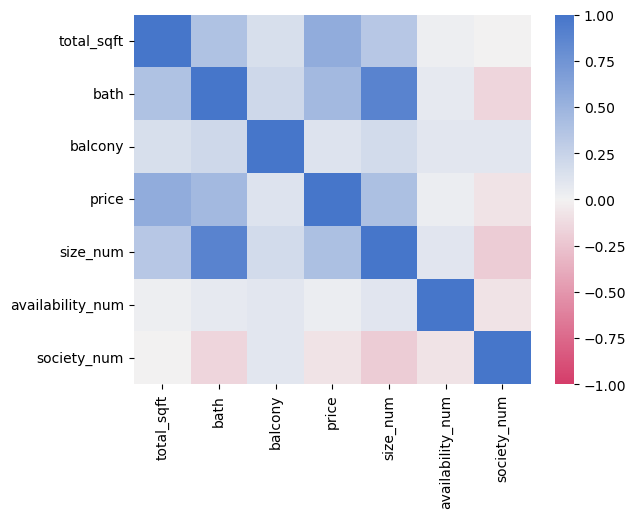

In [16]:
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap=sns.diverging_palette(0, 255, sep=1, n=256), vmin=-1, vmax=1)

# Dimensionality Reduction Using Auto-Encoders

In [69]:
input_img = keras.Input(shape=(6,))
encoded = layers.Dense(128, activation='relu')(input_img)
encoded = layers.Dense(64, activation='relu')(encoded)
encoded = layers.Dense(32, activation='relu')(encoded)

decoded = layers.Dense(64, activation='relu')(encoded)
decoded = layers.Dense(128, activation='relu')(decoded)
decoded = layers.Dense(784, activation='sigmoid')(decoded)

autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

autoencoder.fit(x_train, x_train,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))
